# Week 3: the Twitter API

In this lesson, we're going to learn how to analyze and explore Twitter data with the Python/command line tool [twarc](https://twarc-project.readthedocs.io/en/latest/). We're specifically going to work with [twarc2](https://twarc-project.readthedocs.io/en/latest/twarc2/), which is designed for version 2 of the Twitter API (released in 2020) and the Academic Research track of the Twitter API (released in 2021), which enables researchers to collect tweets from the entire Twitter archive for free.

Twarc was developed by a project called [Documenting the Now](https://www.docnow.io/). The DocNow team develops tools and ethical frameworks for social media research.

> This notebook builds upon the work of [Melanie Walsh](https://melaniewalsh.github.io/Intro-Cultural-Analytics/), released under a [Creative Commons BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) License. This notebook shares the same license.

<div class="alert-warning alert">

**Note1:** There is a major difference in the workflow throughout this exercise. It is because the way `twarc2` is designed. It is a command-line tool that needs to be run from a terminal shell. In a Jupyter notebook, we can run these shell commands directely from the notebook prefixing them with `!`.

As a consequence of this, there are differences in how the notebook needs to be run for Windows and Linux/MacOS machines. By default, the notebook should work for Linux/MacOs users. Where there are differences for Windows users, those will be comments in the code. You can also avoid this issue by running on DeepNote or Google Collab.

For example, you might have used `ls` command in the terminal to list the contents of the directory. Try running `!ls` from this notebook now. 
</div>



In [1]:
# Windows users: 
!dir

# Linux/Mac Users:
#!ls

 Volume in drive C has no label.
 Volume Serial Number is 9E25-63F8

 Directory of C:\Users\Andre\OneDrive\Documents\GitHub\accessing-research-data\week-3

01/27/2023  11:39 AM    <DIR>          .
01/10/2023  08:57 AM    <DIR>          ..
01/27/2023  11:08 AM    <DIR>          .ipynb_checkpoints
01/27/2023  11:37 AM         3,800,160 twarc.log
01/27/2023  11:38 AM           238,669 week-3-twitter-solutions.ipynb
01/10/2023  08:57 AM            48,767 week-3-twitter.ipynb
               3 File(s)      4,087,596 bytes
               3 Dir(s)  235,381,526,528 bytes free


<div class="alert-warning alert">

**Note2:** The commands that we run using `!twarc2` will result in a file being saved in the local directory. You can check this file through the file browser towards the left hand side. We will use `pandas` to read the resulting file. 

</div>

### Workflow

We will need to install three command line tools:
- the program `twarc2` to access Twitter API, in order to archive tweets, counts, user metadata.
- `twarc-csv`, a plugin to convert the tweets archived by `twarc2` into a CSV format.
- `twarc-hashtags`, a plugin to analyze hashtag counts in the tweets retrieved by `twarc2`.

Note: the program `twarc2` requires the Python package `twarc` (with no 2). The number ‘2’ is for the Twitter API v2.


In [2]:
%%capture
!pip install twarc --upgrade
!pip install twarc-csv --upgrade
!pip install twarc-hashtags --upgrade

## Configure and set up twarc2

Once twarc2 is installed, you need to configure it with your API keys and/or bearer token so that you can actually access the API.

If you are running this notebook in DeepNote, select the terminal icon on the left hand side. If you are running this notebook in your local computer or on server, you will need to open a terminal. 

Run the following command in the terminal (Windows: use Anaconda Prompt or Powershell, not Cmd Prompt)
```
twarc2 configure

```


Twarc will ask for your bearer token, which you can copy and paste into the blank after the colon, and then press enter. You can optionally enter your API keys, as well. When it asks how you want to obtain user keys, I recommend generating keys by visiting Twitter.

If you’ve entered your information correctly, you should get a congratulatory message that looks something like this:

```
Your keys have been written to /Users/<your username>/Library/Application Support/twarc/config

✨ ✨ ✨  Happy twarcing! ✨ ✨ ✨

```

<br />

Now you’re ready to collect and analyze tweets!

## Archive tweets matching a query

To collect tweets from the Twitter API, we need to form a query and ask twarc2 to download all the tweets that match it: `twarc2 search *query*`. The simplest kind of query is a keyword search, such as the phrase “Oxford Internet Institute,” which should return any tweet that contains all of these words in any order — `twarc2 search "Oxford Internet Institute"`.

<div class="alert-info alert">

**Exercise 0.1:** Retrieve the tweets that contain the keywords (in any order) "Oxford Internet Institute" and save them to `tweets-oii.json`

</div>


To output Twitter data to a file, we include a filename with the “.jsonl” file extension, which stands for JSON lines, a special kind of JSON file:

In [3]:
!twarc2 search "YOUR QUERY" tweets-oii.jsonl


  0%|          | Processed a moment/6 days [00:00<?, 0 tweets total ]
 27%|██▋       | Processed a day/6 days [00:02<00:05, 0 tweets total ]
 50%|█████     | Processed 3 days/6 days [00:03<00:03, 100 tweets total ]
 68%|██████▊   | Processed 4 days/6 days [00:05<00:02, 200 tweets total ]
 99%|█████████▉| Processed 6 days/6 days [00:07<00:00, 300 tweets total ]
100%|██████████| Processed 6 days/6 days [00:07<00:00, 380 tweets total ]


<div class="alert-info alert">

**Exercise 0.2:** Convert these tweets into a `csv` file named `tweet-oii.csv`.

Use `pandas` in Python to load that CSV file and count the number of tweets returned by the search.
</div>


In [4]:
!twarc2 csv tweets-oii.jsonl tweets-oii.csv


  0%|          | Processed 0.00/1.96M of input file [00:00<?, ?B/s]
100%|██████████| Processed 1.96M/1.96M of input file [00:00<00:00, 18.0MB/s]
100%|██████████| Processed 1.96M/1.96M of input file [00:00<00:00, 8.51MB/s]

ℹ️
Parsed 380 tweets objects from 4 lines in the input file.
Wrote 380 rows and output 83 columns in the CSV.



In [5]:
import pandas as pd 

# The filename here is based on what you chose to call the file in the previous cell
tweets = pd.read_csv("FILENAME")

tweets.head()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version
0,1618927055672057861,1618600238020984834,1.618600e+18,NaN,NaN,1280951016851222528,1.377685e+18,Wealth_Pill,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27T11:40:09+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0
1,1618926834799808514,1618926834799808514,NaN,NaN,NaN,1395314583510913027,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27T11:40:09+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0
2,1618919267902300161,1618919267902300161,NaN,NaN,NaN,20778120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27T11:40:09+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0
3,1618910728056090630,1618910724759371777,1.618911e+18,NaN,NaN,469182585,4.691826e+08,risj_oxford,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27T11:40:09+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0
4,1618908871564709888,1618908871564709888,NaN,NaN,NaN,1047331332,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27T11:40:09+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0


<div class="alert-info alert">

**Exercise 0.3:** Next, we are going to rename a number of columns to make the data more readable. we are going to rename the columns. Look at the columns and find which columns represent `date of the tweet`,`number of retweets`, `number of likes`, `number of quotes`,  `number of replies`, `author twitter handle`, `author name`, `author's twitter bio`, `text of the tweet`,  `whether the author is verified or not`.

The documentation may help: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet
    
</div>

In [6]:
print(tweets.columns)

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'in_reply_to_username',
       'retweeted_user_id', 'retweeted_username', 'quoted_user_id',
       'quoted_username', 'created_at', 'text', 'lang', 'source',
       'public_metrics.impression_count', 'public_metrics.reply_count',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.like_count', 'reply_settings', 'edit_history_tweet_ids',
       'edit_controls.edits_remaining', 'edit_controls.editable_until',
       'edit_controls.is_edit_eligible', 'possibly_sensitive',
       'withheld.scope', 'withheld.copyright', 'withheld.country_codes',
       'entities.annotations', 'entities.cashtags', 'entities.hashtags',
       'entities.mentions', 'entities.urls', 'context_annotations',
       'attachments.media', 'attachments.media_keys',
       'attachments.poll.duration_mi

In [7]:
# In this dictionary, the keys are the old column names, and the values are the new names
# I've prefilled all of the values, and most of the keys for you. Do the rest based on the documentation.

def rename_dataframe_tweets(dataframe):
    """ Rename the columns of a dataset archived by twarc2. """
    return dataframe.rename(columns={
        'YOUR CODE HERE': 'date',
        'public_metrics.retweet_count': 'retweets', 
        'author.username': 'username', 
        'author.name': 'name',
        'YOUR CODE HERE': 'verified', 
        'public_metrics.like_count': 'likes', 
        'public_metrics.quote_count': 'quotes', 
        'public_metrics.reply_count': 'replies',
        'author.description': 'user_bio',
        'YOUR CODE HERE' : 'hashtags'
    })

tweets = rename_dataframe_tweets(tweets)

# note we are keeping the column `text` as it is. 
tweets = tweets[['date', 'retweets', 'username', 'name', 'verified', 'likes', 'quotes', 'replies', 'user_bio', 'text', 'hashtags']]

Now we can view our more focused DataFrame!

In [8]:
tweets.head()

,date,retweets,username,name,verified,likes,quotes,replies,user_bio,text,hashtags
0,2023-01-27T11:01:02.000Z,0,iamsadielane,Sadie Lane,False,0,0,0,"Artist & Designer #becomelove Freedom Fighter,...","@Wealth_Pill I agree with this, and now you ca...",NaN
1,2023-01-27T11:00:10.000Z,0,Shavtge,Shav,False,0,0,1,Data Scientist | Blockchain & Distributed Ledg...,#ChatGPT is amazing but it's not without its f...,"[""#ChatGPT"", ""#AI"", ""#NLP""]"
2,2023-01-27T10:30:06.000Z,0,john_w_hayes,John W Hayes,False,1,0,0,"Content Marketing, Email Marketing and Social ...","Amazon is developing ""similar technology"" to C...",NaN
3,2023-01-27T09:56:10.000Z,0,risj_oxford,Reuters Institute,True,0,0,1,Exploring the future of journalism. Subscribe ...,🤖 Founder @peretti said in a memo @BuzzFeed wo...,NaN
4,2023-01-27T09:48:47.000Z,0,Sammidadwal,S@MM! H@k3r,False,0,0,0,Helping Nation to build a better working Digit...,Excited to share the power of #ChatGPT for #cy...,"[""#ChatGPT"", ""#cybersecurity""]"


<div class="alert-info alert">

**Exercise 0.4:** Let's have a look at the text of these tweets. Print 10 tweets from the dataframe. 

</div>

In [9]:
# Iterate over the text column of the DataFrame
for t in ???:
    print(t)

@Wealth_Pill I agree with this, and now you can use ChatGPT to assist in these endeavors or to help you learn.
#ChatGPT is amazing but it's not without its flaws... CEO of Wolfram suggests that some tasks require a symbolic language like Wolfram on which to apply structured computational knowledge power; combining ChatGPT with @WolframResearch could be the 'power assist' it needs #AI #NLP https://t.co/b9wFnMM0ml
Amazon is developing "similar technology" to ChatGPT — a revelation that appeared to pique the interest of employees who said that using the AI to assist their code-writing had resulted in a tenfold productivity boost. https://t.co/G6Npnb4QwF
🤖 Founder @peretti said in a memo @BuzzFeed would rely on ChatGPT to enhance its quizzes and personalise some content. He expects AI to assist the creative process while humans play the role of providing ideas, "cultural currency" and "inspired prompts"\nhttps://t.co/3PB3TLcrr4
Excited to share the power of #ChatGPT for #cybersecurity educ

<div class="alert-info alert">

**Exercise 0.5:** Analyze  the hashtags in the above tweets and save the resulting counts of hashtags in a CSV file named `hashtags-oii.csv`. Read this csv file in `pandas` and check the counts of these hashtags.

</div>

In [10]:
# This command may break on Windows. If the error is about encodings, ignore it for now and keep going.
!twarc2 hashtags tweets-oii.jsonl hashtags-oii.csv


  0%|          | Processed 0.00/1.96M of input file [00:00<?, ?B/s]
100%|█████████▉| Processed 1.96M/1.96M of input file [00:00<00:00, 17.8MB/s]
100%|█████████▉| Processed 1.96M/1.96M of input file [00:00<00:00, 12.9MB/s]


In [11]:
hashtags_oii = pd.read_csv('hashtags-oii.csv')
hashtags_oii

,hashtag,tweets
0,chatgpt,126
1,ai,41
2,wharton,8
3,us,8
4,mba,8
...,...,...
139,aigc,1
140,aiemailmarketing,1
141,aied,1
142,actgpt,1


## Get Tweets (Academic Track, Full Twitter Archive)

So far we have been querying the standard Twitter API that limits the search results to the past 7 days. In order to search the full Twitter archive, we only need to add a single flag of `--archive` to our `twarc2 search` command so that the command now looks like `twarc2 search *query* --archive filename`. If you do not have full API access, try to either find someone to work with who does, or run the commands without the `--archive` flag.

<div class="alert-info alert">

**Exercise 1:** Now repeat the Exercise 0.1, 0.2, and 0.3 by running the search query on the entire archive.

For the sake of clarity, add `-archive` to the .jsonl output file. For example, save the tweets in `tweet-oii-archive.jsonl`. 

</div>




In [13]:
# To limit the time your query will take to run, let's add --start-time 2021-01-01 to limit tweets to 2021—2022.

# FYI - this cell takes a WHILE to run, don't worry if it seems slow.

# Don't try to cancel the call if you can help it. Oftentimes twarc will keep running in the 
# background and using your API access even after the cell has been stopped, which can make
# a mess of your files.

!twarc2 search --archive --start-time 2021-01-01 "YOUR QUERY HERE" tweets-oii-archive.jsonl 
!twarc2 csv tweets-oii-archive.jsonl tweets-oii-archive.csv


  0%|          | Processed a moment/2 years [00:00<?, 0 tweets total ]
  9%|▉         | Processed 2 months/2 years [00:03<00:33, 0 tweets total ]
 15%|█▌        | Processed 3 months/2 years [00:06<00:38, 98 tweets total ]
 17%|█▋        | Processed 4 months/2 years [00:10<00:58, 196 tweets total ]
 19%|█▉        | Processed 4 months/2 years [00:13<01:09, 294 tweets total ]
 24%|██▍       | Processed 5 months/2 years [00:16<00:58, 391 tweets total ]
 31%|███       | Processed 7 months/2 years [00:19<00:43, 490 tweets total ]
 32%|███▏      | Processed 7 months/2 years [00:21<00:53, 585 tweets total ]
 41%|████      | Processed 10 months/2 years [00:24<00:32, 645 tweets total ]
 47%|████▋     | Processed 11 months/2 years [00:27<00:27, 738 tweets total ]
 52%|█████▏    | Processed 1 year, 1 month/2 years [00:31<00:26, 812 tweets total ]
 60%|█████▉    | Processed 1 year, 2 months/2 years [00:34<00:19, 910 tweets total ]
 62%|██████▏   | Processed 1 year, 3 months/2 years [00:37<00:24, 9

In [14]:
tweets = pd.read_csv("tweets-oii-archive.csv")

tweets = rename_dataframe_tweets(tweets)  # We reuse the function we defined above

tweets = tweets[['date', 'retweets', 'username', 'name', 'verified', 'likes', 'quotes', 'replies', 'user_bio']]
print(f"We collected {tweets.shape[0]} tweets!")

We collected 2604 tweets!



<div class="alert-warning alert">

**Windows Users:** The command below may raise an error involving problems encoding certain characters. This is because Windows does not use UTF-8 encodings by default. You can change this in your language settings if you really want it to work, but I recommend just adding the hastags column to the DataFrame above and skipping this cell.

</div>

In [15]:
!twarc2 hashtags tweets-oii-archive.jsonl hashtags-oii-archive.csv


  0%|          | Processed 0.00/12.3M of input file [00:00<?, ?B/s]
 19%|█▉        | Processed 2.39M/12.3M of input file [00:00<00:00, 19.8MB/s]
 30%|███       | Processed 3.70M/12.3M of input file [00:00<00:00, 14.1MB/s]
 41%|████      | Processed 5.04M/12.3M of input file [00:00<00:00, 13.4MB/s]
 54%|█████▍    | Processed 6.64M/12.3M of input file [00:00<00:00, 12.9MB/s]
 64%|██████▍   | Processed 7.89M/12.3M of input file [00:00<00:00, 12.4MB/s]
 76%|███████▌  | Processed 9.32M/12.3M of input file [00:00<00:00, 12.3MB/s]
 90%|█████████ | Processed 11.1M/12.3M of input file [00:00<00:00, 13.1MB/s]
100%|█████████▉| Processed 12.3M/12.3M of input file [00:00<00:00, 12.4MB/s]
100%|█████████▉| Processed 12.3M/12.3M of input file [00:01<00:00, 12.7MB/s]


In [16]:
hashtags_oii = pd.read_csv('hashtags-oii-archive.csv')
hashtags_oii

,hashtag,tweets
0,oxford,82
1,ai,82
2,ap,67
3,phd,37
4,swisscognitive,29
...,...,...
346,apnic,1
347,antisemitism,1
348,aiforgood,1
349,adolescents,1


## Advanced Search of Twitter API





The Twitter API is very complex and not everything can be taught in this class. Our aim is to show you the basis but also get you comfortable in constructing more complex queries.

There are many other operators that we can add to a query, which would allow us to collect tweets only from specific Twitter users or locations, or to only collect tweets that meet certain conditions, such as containing an image or being authored by a verified Twitter user. Here’s an table of the main search operators taken from the Twitter documentation (https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#list). If you're interested, look also at:

- Twarc's own documentation: https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/
- Some advanced examples from `twitterdev` Github account: https://github.com/twitterdev/getting-started-with-the-twitter-api-v2-for-academic-research/blob/main/modules/5-how-to-write-search-queries.md

<hr />
<br />

| Search Operator      | Explanation | Example |
|:---------------------|:------------|:------- |
| `keyword`              | Matches a keyword within the body of a Tweet. |`so sweet and so cold` |                    
| `"exact phrase match"` | Matches the exact phrase within the body of a Tweet. | `"so sweet and so cold" OR "plums in the icebox"` |
| `-`                    | Do NOT match a keyword or operator | `birthday -happy`, `oxford -university` |
| `#`                    | Matches any Tweet containing a recognized hashtag.  | `#arthistory` |
| `from:`, `to:`         | Matches any Tweet from or to a specific user. | `from:cynddl` `to:cynddl` |
| `place:`               | Matches Tweets tagged with the specified location or Twitter place ID. | `place:"new york city" OR place:london` |
| `is:reply`, `is:quote` | Returns only replies or quote tweets. | `thank you is:reply` ` from:OxfordUCU is:quote` |
| `is:verified`          | Returns only Tweets whose authors are verified by Twitter. | `buy NFT is:verified` |
| `has:media`            | Matches Tweets that contain a media object, such as a photo, GIF, or video, as determined by Twitter. | `My new song is out has:media` |
| `has:images`, `has:videos` | Matches Tweets that contain a recognized URL to an image. | `the view from my window has:images` |
| `has:geo`              | Matches Tweets that have Tweet-specific geolocation data provided by the Twitter user. | `honeymoon has:geo` |



### Query construction

- To construct a query of two keywords with **logical AND**, use a space. So if the search term is `corona` and `coronavirus`, our query will be `"corona coronavirus"`
- To construct a query of two keywords with **logical OR**, we use OR as a keyword. So if the search term is `corona`or `coronavirus` our query will be `"corona OR coronavirus"`
- To construct a query to **match exact phrase**, we enclose that phrase in quotation marks. So if the search term is `covid` OR `corona virus`, our query will be `'corona OR "corona virus"'`. **NOTE** how we have enclosed the query in single quotes because the inner phrase needs to use double quotes.
- To construct a **complex query** which has `keyword1` and either of `keyword2` or `keyword1`, we can enclose the OR condition in circular parenthesis. Thus, our query will be `"keyword1 (keyword2 OR keyword3)"`.

### Filters

The table above presented a few filters you can add to your queries. For a full list, please refer to the API documentation. For instance:

- To filter the tweets by authors who are verified by Twitter (journalists, artists, politicians, etc.), add `is:verified` to your query.  For example, to search for `keyword1` only from authors who are verified, our query will be ``keyword1 is:verified"`
- To filter by tweets that have some form of media, our query will look like `"keyword1 has:media"`

### Other command-line options

There are two options that are specific to `twarc` so you will have to add them to your command instead to your query.

- **Search limit:** if you want to limit your query to just 500 tweets, the command will look like `twarc2 search "query" --limit 500 output.jsonl`

- **Time range:** if you want to limit your search reesults to a time range, the command will look like `twarc2 search --start-time 2014-07-17 --end-time 2014-07-24 "query" output.jsonl` Note that time ranges are only useful if you have academic access to the API, as it requires historical data.


Let's get used to all this through an example. 

<div class="alert-info alert">

**Exercise 2.1:** We will search for posts related to Russian invasion of Ukraine and the conflict in Ukraine. Since the volume of tweets containing `Ukraine` or `Russia` is too much to be dealt in the duration of the class, we will narrow down our search using keywords and filters.

Let's construct a query with the following specifications:
- contains exact words/phrases: either `Russia` or `Россия` and either `Ukraine` or `Украина`
- is tweeted only by verified authors
- contains hashtags
- has media
- is not a retweet (`-is:retweet`).

We will further limit our search results based on the following criteria
- Maximum 50,000 tweets
- Start date be 2022-02-27
- End date be 2022-02-28

Store the output in `tweets-ukr-rus.jsonl`.
</div>


Build your query here, then paste it in below:

- contains the exact words: either `Russia OR Россия`

- contains the exact words: either `Ukraine OR Украина`

- is tweeted only by verified authors

- contains hashtags

- has media

- is not a retweet (use `-` minus for `not`)

Put all the pieces together into one big string separated by spaces:


In [37]:
# your query
''

''

In [17]:
# note that you cannot pass a python variable to the command line, so you have to paste the string in
!twarc2 search --archive --limit 50000 --start-time 2022-02-27 --end-time 2022-02-28 "YOUR QUERY HERE" tweets-ukr-rus.jsonl


  0%|          | Processed a moment/a day [00:00<?, 0 tweets total ]
 12%|█▏        | Processed 2 hours/a day [00:03<00:23, 0 tweets total ]
 18%|█▊        | Processed 4 hours/a day [00:06<00:31, 100 tweets total ]
 24%|██▍       | Processed 5 hours/a day [00:09<00:33, 200 tweets total ]
 29%|██▉       | Processed 6 hours/a day [00:12<00:34, 300 tweets total ]
 33%|███▎      | Processed 7 hours/a day [00:15<00:38, 400 tweets total ]
 37%|███▋      | Processed 8 hours/a day [00:18<00:40, 500 tweets total ]
 39%|███▉      | Processed 9 hours/a day [00:22<00:45, 600 tweets total ]
 42%|████▏     | Processed 10 hours/a day [00:25<00:49, 700 tweets total ]
 45%|████▌     | Processed 10 hours/a day [00:28<00:49, 800 tweets total ]
 49%|████▊     | Processed 11 hours/a day [00:31<00:46, 900 tweets total ]
 52%|█████▏    | Processed 12 hours/a day [00:34<00:42, 1000 tweets total ]
 55%|█████▍    | Processed 13 hours/a day [00:37<00:42, 1100 tweets total ]
 58%|█████▊    | Processed 13 hours/a

<div class="alert-info alert">

**Exercise 2.2:** Write the `twarc2` command to convert the `jsonl` file to a CSV file.
</div>

In [18]:
!twarc2 ??? tweets-ukr-rus.jsonl tweets-ukr-rus.csv


  0%|          | Processed 0.00/18.5M of input file [00:00<?, ?B/s]
 13%|█▎        | Processed 2.33M/18.5M of input file [00:00<00:00, 17.0MB/s]
 21%|██▏       | Processed 3.97M/18.5M of input file [00:00<00:00, 16.8MB/s]
 31%|███       | Processed 5.70M/18.5M of input file [00:00<00:00, 15.6MB/s]
 40%|███▉      | Processed 7.38M/18.5M of input file [00:00<00:00, 16.2MB/s]
 53%|█████▎    | Processed 9.86M/18.5M of input file [00:00<00:00, 16.9MB/s]
 63%|██████▎   | Processed 11.6M/18.5M of input file [00:00<00:00, 15.4MB/s]
 77%|███████▋  | Processed 14.2M/18.5M of input file [00:00<00:00, 16.8MB/s]
 92%|█████████▏| Processed 17.0M/18.5M of input file [00:01<00:00, 16.8MB/s]
100%|██████████| Processed 18.5M/18.5M of input file [00:01<00:00, 10.3MB/s]

ℹ️
Parsed 2155 tweets objects from 22 lines in the input file.
Wrote 2155 rows and output 83 columns in the CSV.



<div class="alert-info alert">

**Exercise 2.3:** Read the above CSV file using pandas

- Look at the columns and find which columns represent `date of the tweet`,`number of retweets`, `number of likes`, `number of quotes`,  `number of replies`, `author twitter handle`, `author name`, `author's twitter bio`, `whether the author is verified or not`
- Let's rename to `date`, `retweets`, `likes`, `quotes`, `replies`, `username`, `name`, `user_bio`, `verified`.
- Let's keep only these columns as well as the main text of the tweet.

</div>

In [19]:
tweets = pd.read_csv("tweets-ukr-rus.csv")

In [20]:
tweets = rename_dataframe_tweets(tweets)  # We reuse the function we defined above

tweets = tweets[['SELECT THE COLUMNS WE WANT','HERE']].copy()

tweets.head()

,date,retweets,username,name,verified,likes,quotes,replies,user_bio,text
0,2022-02-27T23:58:27.000Z,3,pajhwok,Pajhwok Afghan News,True,22,0,1,Nationwide news agency covering Afghanistan wi...,Russian president Vladimir Putin has been susp...
1,2022-02-27T23:56:29.000Z,0,SlamSports,SLAM! Sports,True,0,0,0,"The sports tab at http://t.co/m4q1hGW5kC, Sun ...","TODD: Yes, Ovechkin can do something about Put..."
2,2022-02-27T23:55:22.000Z,1,sandipseth,Dr. Sandeep Seth,True,5,0,0,EDITOR (Assignment) @TV9Bharatvarsh | EX @Repu...,VIDEO of #Rocket claimed to be launched from t...
3,2022-02-27T23:55:07.000Z,7,TW_nextmedia,蘋果新聞網 Taiwan News,True,44,1,2,為台灣本地和世界華人帶來最新的新聞娛樂資訊！Apple Daily is the large...,基輔遭俄軍全面包圍！衛星影像曝光 歐盟破例提供烏克蘭戰機（不斷更新）\n#烏克蘭 #俄羅斯 ...
4,2022-02-27T23:55:06.000Z,0,nancyrockland,nancy cutler,True,2,0,0,I write about People & Policy for @lohud @reco...,"INBOX: @GovKathyHochul ""directs all New York S..."


<div class="alert-info alert">

**Exercise 2.4:**  What are the most popular tweets? Let's sort them:

- in descending order of the number of  likes;
- in descending order of the number of  retweets.

</div>

In [21]:
tweets.sort_values("COLUMN NAME", ascending=False)

,date,retweets,username,name,verified,likes,quotes,replies,user_bio,text
110,2022-02-27T20:52:15.000Z,4518,Ukraine,Ukraine / Україна,True,31054,241,597,"Yes, this is the official Twitter account of U...",Multinational corporations divert and stop the...
608,2022-02-27T15:02:57.000Z,2463,CNNSotu,State of the Union,True,10625,847,1103,From the staff of #CNNSOTU w/ @JakeTapper & @D...,"""It's unthinkable to me. It's almost treasonou..."
1058,2022-02-27T11:45:09.000Z,1871,Tsihanouskaya,Sviatlana Tsikhanouskaya,True,7861,83,96,National leader of Belarus / Telegram https://...,"People across Belarus chant ""no to war"". They ..."
750,2022-02-27T14:04:57.000Z,2073,AFP,AFP News Agency,True,7591,520,720,Top news and features from AFP's reporters aro...,#UPDATE Ukraine says it will hold talks with R...
2027,2022-02-27T02:41:30.000Z,1635,NicholasRennick,Dr Rennick 🇯🇵在住🇦🇺人医師,True,6357,83,36,オーストラリア人｜2020年に🇯🇵へ移住｜🇦🇺総合診療専門医(GP)｜日本の医師｜日本医師国...,世界中の有名なビルがウクライナ🇺🇦の色へ。\n\n是非もう一つ追加したい。東京タワー、よろし...
...,...,...,...,...,...,...,...,...,...,...
1270,2022-02-27T10:16:45.000Z,0,HeartNewsEast,Heart News East,True,0,0,0,We're the newsteam for Heart East covering the...,The Bishops of #Chelmsford &amp; #Thetford and...
858,2022-02-27T13:18:51.000Z,2,NewsMobileIndia,NewsMobile,True,0,0,0,NewsMobile is a fact checked mobile news and c...,🔲 Ukraine's President Volodymyr Zelenskiy urge...
362,2022-02-27T17:19:04.000Z,0,Ben_oharabyrne,Ben O'Hara-Byrne,True,0,0,0,Host “A Little More Conversation” Mon-Fri 7-10...,A photo from Moscow 2015 of tributes to Boris ...
746,2022-02-27T14:06:16.000Z,0,Danict89,Daniele Palumbo,True,0,1,0,@BBCnews Data & #Investigative Journalist 📈 | ...,#Breaking\n\n#Zelenskyy and #Lukashenka have a...


In [22]:
tweets.sort_values("COLUMN NAME", ascending=False)

,date,retweets,username,name,verified,likes,quotes,replies,user_bio,text
110,2022-02-27T20:52:15.000Z,4518,Ukraine,Ukraine / Україна,True,31054,241,597,"Yes, this is the official Twitter account of U...",Multinational corporations divert and stop the...
608,2022-02-27T15:02:57.000Z,2463,CNNSotu,State of the Union,True,10625,847,1103,From the staff of #CNNSOTU w/ @JakeTapper & @D...,"""It's unthinkable to me. It's almost treasonou..."
750,2022-02-27T14:04:57.000Z,2073,AFP,AFP News Agency,True,7591,520,720,Top news and features from AFP's reporters aro...,#UPDATE Ukraine says it will hold talks with R...
1058,2022-02-27T11:45:09.000Z,1871,Tsihanouskaya,Sviatlana Tsikhanouskaya,True,7861,83,96,National leader of Belarus / Telegram https://...,"People across Belarus chant ""no to war"". They ..."
2027,2022-02-27T02:41:30.000Z,1635,NicholasRennick,Dr Rennick 🇯🇵在住🇦🇺人医師,True,6357,83,36,オーストラリア人｜2020年に🇯🇵へ移住｜🇦🇺総合診療専門医(GP)｜日本の医師｜日本医師国...,世界中の有名なビルがウクライナ🇺🇦の色へ。\n\n是非もう一つ追加したい。東京タワー、よろし...
...,...,...,...,...,...,...,...,...,...,...
1593,2022-02-27T07:41:12.000Z,0,MSNArabia_EN,MSN Arabia - English,True,0,0,0,"Trusted news from UAE, Middle-East and the wor...",#ElonMusk opens #Starlink satellite internet s...
136,2022-02-27T20:32:59.000Z,0,JagbaniOnline,Jagbani,True,4,0,0,"The Punjab Kesari Group's punjabi daily, Jag B...","ਬੰਦਰਗਾਹਾਂ 'ਤੇ ਕਬਜ਼ਾ ਕਰਨ ਦੀ ਕੋਸ਼ਿਸ਼ 'ਚ ਰੂਸ, ਖਾਰ..."
1596,2022-02-27T07:39:45.000Z,0,LebForcesNews,Lebanese Forces News,True,1,0,0,"Political, economical and social news from Leb...",#بيلاروسيا تحتضن مفاوضات #روسيا و #أوكرانيا\nh...
1607,2022-02-27T07:36:37.000Z,0,ZeePunjabHH,Zee PHH,True,4,0,0,"पंजाब, हरियाणा, हिमाचल और जम्मू-कश्मीर की ख़बर...","ਪਟਰੋਲ ਪੰਪ 'ਤੇ ਲੱਗੀਆਂ ਲਾਈਨਾਂ, ਲੋਕ ਟੈਂਕੀਆਂ, ਟਰਾਲ..."


<div class="alert-info alert">

**Exercise 2.5:**  Let's plot the hourly frequency of tweets.

- Check the type of elements that `date` column has. Are they `str` or `datatime` objects? If they are `str`, we need to convert them to `datetime` objects so that we can do the necessary aggregation. We will use `pd.to_datetime` to do that.
- We will use a handy functionality in pandas to do a frequency count on datetime objects. To do that, we need to set the index of dataframe as `date` column.
- We will use `resample` functionality of `pandas` to resample the datetime index into bins according to the specification. For example, if you want to plot daily frequency, pass the argument `'D'`, and if you want to plot hourly frequency, pass the argument `'H'`. Call `.resample('H')` on the dataframe obtained above.
- In order to aggregate these results, we will use `.size()` function on the resampled dataframe.
- Finally, we will plot the resulting counts using `.plot()`, a handy pandas method that calls the matplotlib library.

</div>



In [23]:
# What does the date column contains? A series of string objects.
print(tweets['date'].loc[0])
print(type(tweets['date'].loc[0])) 

2022-02-27T23:58:27.000Z
<class 'str'>


In [24]:
# Let's convert it to a pandas datetime series:
tweets['date'] = pd.to_datetime(tweets['date'])

In [25]:
# We convert the dataframe to have the date column as an ‘index’
tweets_by_date = tweets.copy()
tweets_by_date.set_index('date', inplace=True)

# We now make use of pandas' advanced timeseries processing tools: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
hourly_tweets = tweets_by_date.resample('H')
hourly_frequency_tweets = hourly_tweets.size()

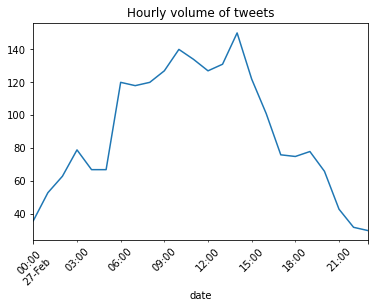

In [26]:
# rot is used to make the x-axis labels fit
hourly_frequency_tweets.plot(title="Hourly volume of tweets", rot=45);

<div class="alert-warning alert">

Although pandas takes time to learn, you eventually gain a lot of times due to the advanced functions it provides.

This **resampling technique is very easy to transfer** for other sort of plots:
- you can adjust the window from years to minutes. For instance, resampling with the rule `'D'` returns days, `'10T'` returns bins of 10 minutes…
- you can use it to compute statistics on any columns, such as average number of likes for instance.

</div>

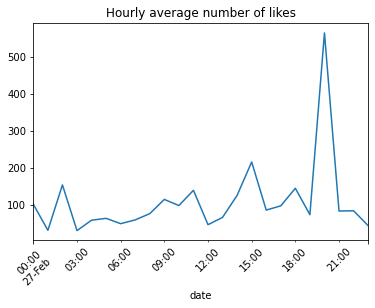

In [27]:
hourly_tweets = tweets_by_date.resample('How can I resample to hourly?')
hourly_tweets.likes.mean().plot(title="Hourly average number of likes", rot=45);

<div class="alert-info alert">


**Exercise 2.7:** Plot the volume of retweets every 30 minutes.

</div>

<AxesSubplot:title={'center':'# of retweets every 30 minutes'}, xlabel='date'>

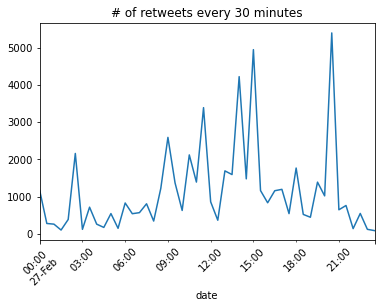

In [28]:
tweets_by_date.resample('What about half hourly?').retweets.sum().plot(title="# of retweets every 30 minutes", rot=45)

<div class="alert-info alert">

**Exercise 2.8:**  Use `twarc` to output summary of hashtags in the retrieved tweets and save the final output in CSV format at `hashtags-ukr-rus.csv`

</div>

In [29]:
!twarc2 hashtags tweets-ukr-rus.jsonl hashtags-ukr-rus.csv


  0%|          | Processed 0.00/18.5M of input file [00:00<?, ?B/s]
 13%|█▎        | Processed 2.33M/18.5M of input file [00:00<00:00, 22.1MB/s]
 26%|██▌       | Processed 4.82M/18.5M of input file [00:00<00:00, 21.5MB/s]
 40%|███▉      | Processed 7.38M/18.5M of input file [00:00<00:00, 21.0MB/s]
 49%|████▉     | Processed 9.02M/18.5M of input file [00:00<00:00, 18.5MB/s]
 63%|██████▎   | Processed 11.6M/18.5M of input file [00:00<00:00, 19.7MB/s]
 72%|███████▏  | Processed 13.3M/18.5M of input file [00:00<00:00, 18.1MB/s]
 81%|████████▏ | Processed 15.0M/18.5M of input file [00:00<00:00, 16.9MB/s]
 92%|█████████▏| Processed 17.0M/18.5M of input file [00:00<00:00, 16.4MB/s]
100%|█████████▉| Processed 18.5M/18.5M of input file [00:01<00:00, 13.4MB/s]
100%|█████████▉| Processed 18.5M/18.5M of input file [00:01<00:00, 16.1MB/s]


<div class="alert-info alert">

**Exercise 2.9:**  Read the above CSV file and retrieve the top 10 hastags from there. 

</div>

In [30]:
hashtags_ukraine = pd.read_csv("hashtags-ukr-rus.csv")
hashtags_ukraine.columns

Index(['hashtag', 'tweets'], dtype='object')

In [31]:
# Use sort_values to find the top ten hashtags by number of tweets
hashtags_ukraine.sort_values(???)

,hashtag,tweets
0,ukraine,1355
1,russia,1238
2,russiaukraineconflict,416
3,ukrainerussiawar,337
4,russiaukrainewar,288
...,...,...
628,shankhnaad,1
629,serialattack,1
630,sergiystakhovsky,1
631,sdgs,1


## Optional: archiving only counts of tweets

Some of the queries we tested above quickly take time. If you only want to collect aggregated counts of tweets, disagregated by days for instance, there's an easier way. 

<div class="alert alert-info">

**Exercise 3.1:** Execute the twarc2 command below to count the number of tweets that match a given query.

We will directly obtain the counts by day, in a CSV format.
</div>


**Note:** To call `twarc` for counts, we execute the following command:

```
!twarc2 counts --csv --granularity day "query" filename.csv
```

<br />

Here, `--csv` specifies the desired output format and `--granularity` specifies the aggregation level. 

In [32]:
!twarc2 counts --csv --granularity day "(Russia OR Россия) (Ukraine OR Украина) is:verified has:media has:hashtags" counts-ukr-rus.csv 


  0%|          | Processed a moment/6 days [00:00<?, 0 tweets total ]
100%|██████████| Processed 6 days/6 days [00:00<00:00, 1437 tweets total ]
100%|██████████| Processed 6 days/6 days [00:00<00:00, 1437 tweets total ]


<div class="alert-info alert">

**Exercise 3.2:** Now use pandas to read the CSV file that you saved above. 

- How many columns are there? What does these column mean?
- Plot the daily counts using pandas plot function : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

</div>

In [33]:
counts_ukr_rus = pd.read_csv("counts-ukr-rus.csv")
print(counts_ukr_rus.columns)

Index(['start', 'end', 'day_count'], dtype='object')


In [34]:
counts_ukr_rus.head()

,start,end,day_count
0,2023-01-20T11:43:26.000Z,2023-01-21T00:00:00.000Z,117
1,2023-01-21T00:00:00.000Z,2023-01-22T00:00:00.000Z,161
2,2023-01-22T00:00:00.000Z,2023-01-23T00:00:00.000Z,103
3,2023-01-23T00:00:00.000Z,2023-01-24T00:00:00.000Z,210
4,2023-01-24T00:00:00.000Z,2023-01-25T00:00:00.000Z,249


In [35]:
# Let's convert the start and end series to datetime
counts_ukr_rus['start'] = pd.to_datetime(???)
counts_ukr_rus['end'] = pd.to_datetime(???)

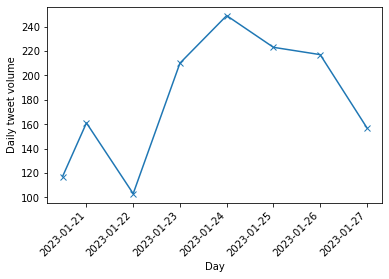

In [36]:
counts_ukr_rus.plot(y="day_count", x="start", rot=45, marker='x', legend=False, ylabel="Daily tweet volume", xlabel="Day");

<div class="alert-warning alert">

**For more examples** of accessing data from Twitter API, check out `twarc`'s documentation: https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/

You can notably use it to access the followers and friends (mutual followers) of a given user.

If you're interested in mapping networks, have a look at another plugin, twarc-network: https://github.com/DocNow/twarc-network

</div>

## This week's datasheet questions

Throughout this course, we will aim to build on the practice of documenting our datasets, using the Datasheet for Datasets framework (here is an <a href="https://github.com/zykls/folktables/blob/main/datasheet.md">example of a datasheet"</a>). In the notebook for this week, you designed a small dataset of tweets related to the conflict in Ukraine. Let's assume you plan to release this dataset online.

How would you structure your Datasheet for this small dataset? For this week's homework, please answer the following questions:

>**How was the data associated with each instance acquired?** Was the data directly observable (e.g., raw text, movie ratings), reported by subjects (e.g., survey responses), or indirectly inferred/derived from other data (e.g., part-of-speech tags, model-based guesses for age or language)? If data was reported by subjects or indirectly inferred/derived from other data, was the data validated/verified? If so, please describe how.

...

>**If the dataset is a sample from a larger set, what was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)?**

...

>**Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances (e.g., recent crawl of old news articles)?** If not, please describe the timeframe in which the data associated with the instances was created.

...

>**Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?** If so, please describe why.

...

>**Did the individuals in question consent to the collection and use of their data?** If so, please describe (or show with screenshots or other information) how consent was requested and provided, and provide a link or other access point to, or otherwise reproduce, the exact language to which the individuals consented.

...
